In [61]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import joblib

In [62]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkbmu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkbmu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkbmu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
data = pd.read_csv(r"C:\Users\kkbmu\OneDrive\Desktop\mini project\Code\train2.csv")

In [64]:
# Get the number of target 1 and target 0
num_target_1 = data['target'].value_counts()[1]
num_target_0 = data['target'].value_counts()[0]

print("Number of target 1:", num_target_1)
print("Number of target 0:", num_target_0)


Number of target 1: 3271
Number of target 0: 4342


In [5]:
dat=data.head(20)
dat

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
dat.text

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
15                                       What's up man?
16                                        I love fruits
17                                     Summer is

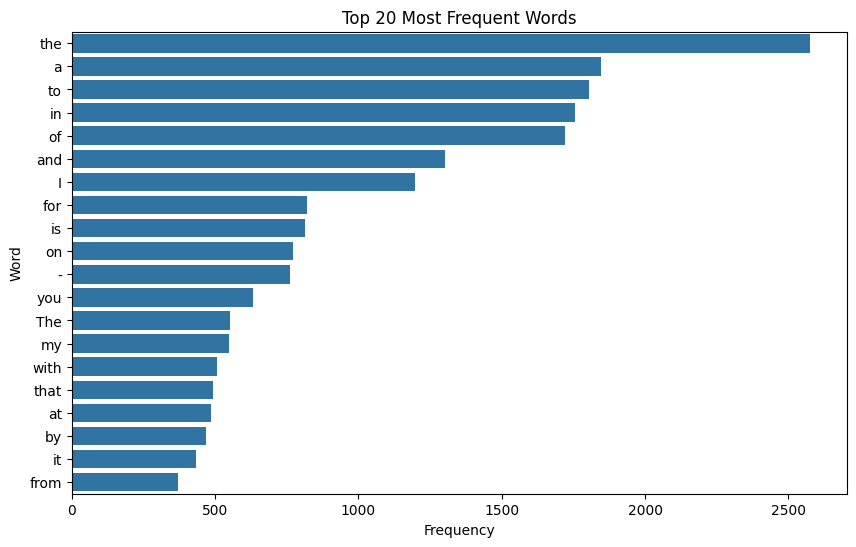

In [7]:
word_freq = data['text'].str.split(expand=True).stack().value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq.values[:20], y=word_freq.index[:20])
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [65]:
stop_words = set(stopwords.words('english'))
stop_words.update(["like", "u", "û_", "amp"])
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove URLs, non-alphanumeric characters, and extra whitespaces
    text = re.sub(r"http\S+|www\S+|https\S+|\W", ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(filtered_tokens)  # Join tokens back into a string

data['text'] = data['text'].apply(preprocess_text)
print(data['text'].head(20))

0          deeds reason earthquake may allah forgive us
1                 forest fire near la ronge sask canada
2     residents asked shelter place notified officer...
3     13 000 people receive wildfires evacuation ord...
4     got sent photo ruby alaska smoke wildfires pou...
5     rockyfire update california hwy 20 closed dire...
6     flood disaster heavy rain causes flash floodin...
7                               top hill see fire woods
8     emergency evacuation happening building across...
9                            afraid tornado coming area
10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa 18 19 ...
13                      flood bago myanmar arrived bago
14        damage school bus 80 multi car crash breaking
15                                                  man
16                                          love fruits
17                                        summer

In [66]:
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    return ' '.join(lemmatized_tokens)  # Join tokens back into a string

data['text'] = data['text'].apply(lemmatize_text)
print(data['text'].head(20))

0            deed reason earthquake may allah forgive u
1                 forest fire near la ronge sask canada
2     resident asked shelter place notified officer ...
3     13 000 people receive wildfire evacuation orde...
4     got sent photo ruby alaska smoke wildfire pour...
5     rockyfire update california hwy 20 closed dire...
6     flood disaster heavy rain cause flash flooding...
7                                top hill see fire wood
8     emergency evacuation happening building across...
9                            afraid tornado coming area
10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa 18 19 ...
13                      flood bago myanmar arrived bago
14        damage school bus 80 multi car crash breaking
15                                                  man
16                                           love fruit
17                                        summer

In [67]:
def remove_numerical_values(text):
    # Remove numerical values entered as text
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

# Apply preprocessing steps
data['text'] = data['text'].apply(remove_numerical_values)

# Show results
print("Text after preprocessing:")
print(data['text'].head(20))

Text after preprocessing:
0            deed reason earthquake may allah forgive u
1                 forest fire near la ronge sask canada
2     resident asked shelter place notified officer ...
3      people receive wildfire evacuation order cali...
4     got sent photo ruby alaska smoke wildfire pour...
5     rockyfire update california hwy closed directi...
6     flood disaster heavy rain cause flash flooding...
7                                top hill see fire wood
8     emergency evacuation happening building across...
9                            afraid tornado coming area
10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa day lo...
13                      flood bago myanmar arrived bago
14           damage school bus multi car crash breaking
15                                                  man
16                                           love fruit
17                    

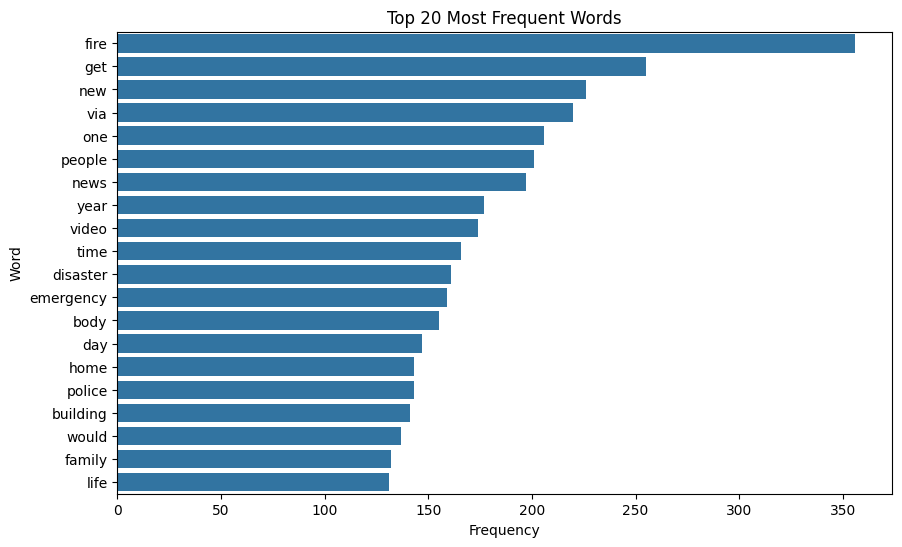

In [51]:
# Import necessary libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate word frequency
word_freq = data['text'].str.split(expand=True).stack().value_counts().sort_values(ascending=False)

# Visualize the top 20 most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq.values[:20], y=word_freq.index[:20])
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()



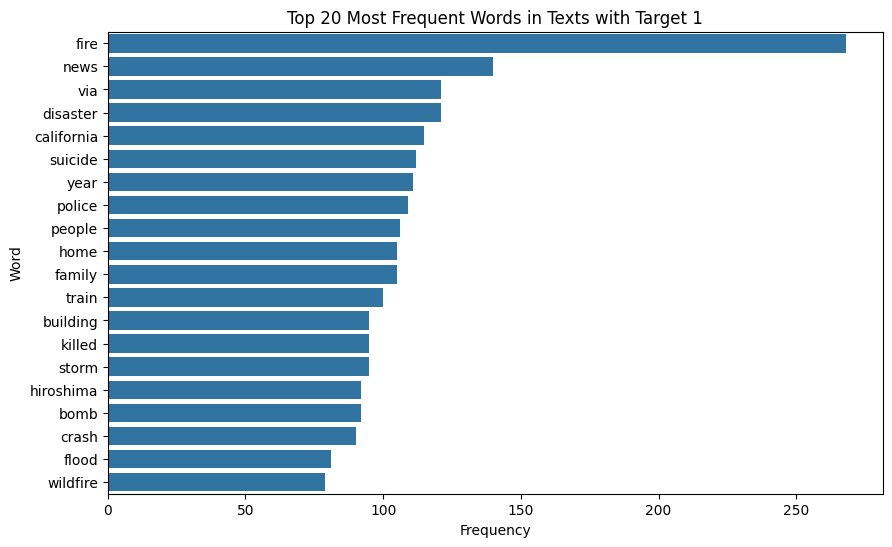

Top 20 Most Frequent Words in Texts with Target 1: ['fire', 'news', 'via', 'disaster', 'california', 'suicide', 'year', 'police', 'people', 'home', 'family', 'train', 'building', 'killed', 'storm', 'hiroshima', 'bomb', 'crash', 'flood', 'wildfire']


In [53]:
# Filter the data to include only texts with target 1
target_1_data = data[data['target'] == 1]

# Calculate word frequency for texts with target 1
word_freq_target_1 = target_1_data['text'].str.split(expand=True).stack().value_counts().sort_values(ascending=False)

# Visualize the top 20 most frequent words in texts with target 1
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq_target_1.values[:20], y=word_freq_target_1.index[:20])
plt.title('Top 20 Most Frequent Words in Texts with Target 1')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()
# Extract the top 20 most frequent words in texts with target 1
top_20_words_target_1 = word_freq_target_1.index[:20].tolist()
print("Top 20 Most Frequent Words in Texts with Target 1:", top_20_words_target_1)


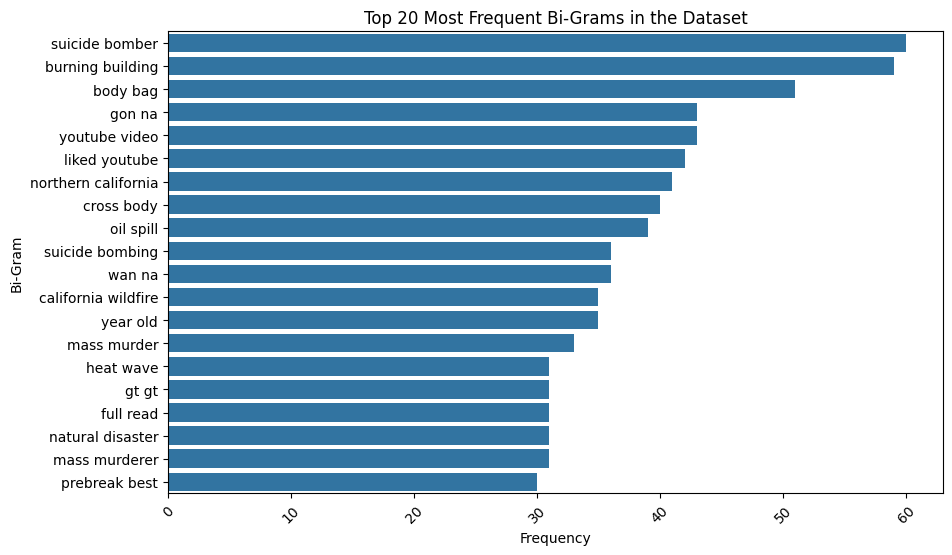

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract bi-grams from text
def extract_ngrams(texts, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(texts)
    vocab = vectorizer.vocabulary_
    ngram_freq = [(word, X[:, vocab[word]].sum()) for word in vocab]  # Sum occurrences across all texts
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)

# Calculate bi-gram frequency for all texts
bi_gram_freq_all = extract_ngrams(data['text'])

# Visualize the top 20 most frequent bi-grams
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in bi_gram_freq_all[:20]], y=[x[0] for x in bi_gram_freq_all[:20]])
plt.title('Top 20 Most Frequent Bi-Grams in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Bi-Gram')
plt.xticks(rotation=45)
plt.show()


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Specify ngram_range as (1, 3) to include unigrams, bigrams, and trigrams
vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data['text'])


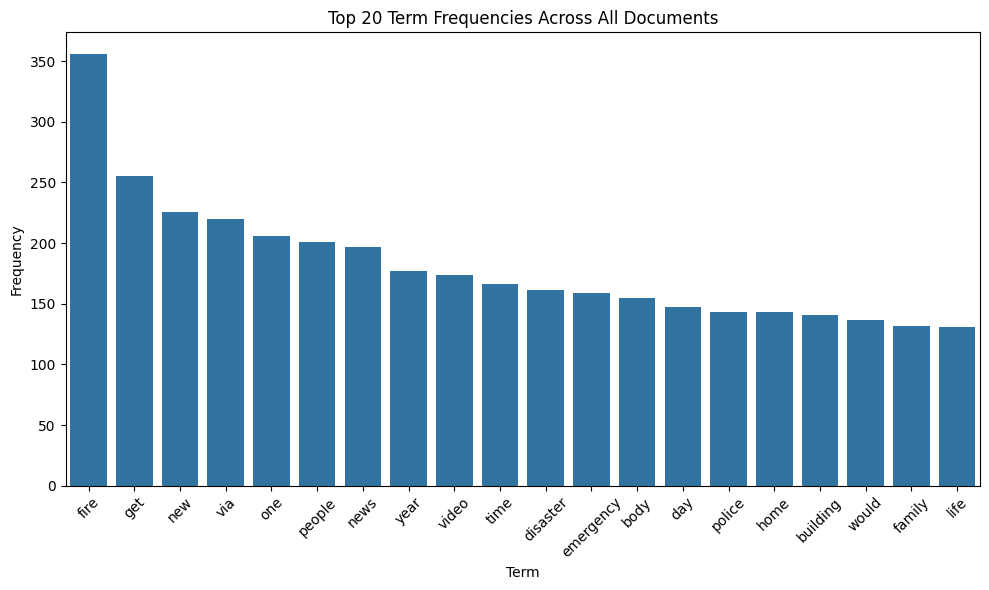

In [35]:
# Calculate the sum of term frequencies across all documents
total_term_freq = X.sum(axis=0)
bar_width=0.1
# Convert the sparse matrix to a DataFrame for easier manipulation
total_term_freq_df = pd.DataFrame(total_term_freq, columns=vectorizer.get_feature_names_out())

# Get the top N terms by sum of term frequencies across all documents
N=20
top_total_terms = total_term_freq_df.sum().sort_values(ascending=False)[:N]

# Visualize the top N term frequencies across all documents
plt.figure(figsize=(10, 6))
sns.barplot(x=top_total_terms.index, y=top_total_terms.values)
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title(f'Top {N} Term Frequencies Across All Documents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, data['target'], test_size=0.2, random_state=42)


In [72]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_clf = MultinomialNB()
naive_bayes_clf.fit(X_train, y_train)
y_pred = naive_bayes_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred)) 

Accuracy: 0.7839789888378201
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       874
           1       0.73      0.77      0.75       649

    accuracy                           0.78      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.78      0.78      1523



In [73]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred)) 


Accuracy: 0.804333552199606
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.68      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [76]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_clf = RandomForestClassifier()

# Fit the classifier to the training data
random_forest_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_clf.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7820091923834537
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83       874
           1       0.85      0.59      0.70       649

    accuracy                           0.78      1523
   macro avg       0.80      0.76      0.76      1523
weighted avg       0.79      0.78      0.77      1523



In [75]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_clf = SVC()

# Fit the classifier to the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_clf.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8010505581089954
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85       874
           1       0.89      0.61      0.72       649

    accuracy                           0.80      1523
   macro avg       0.83      0.78      0.78      1523
weighted avg       0.82      0.80      0.79      1523



In [77]:
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(estimators=[
    ('logistic', logistic_clf),
    ('naive_bayes', naive_bayes_clf),
    ('svm', svm_clf),
], voting='hard')
ensemble_clf.fit(X_train, y_train)
y_pred = ensemble_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8115561391989494
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       874
           1       0.84      0.68      0.76       649

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.82      0.81      0.81      1523

